## Horses Or Humans

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1I2aWD5twJdrq0SI2QD91HB5zCvvvCE_i">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

# The Horses Or Humans Dataset

This dataset contains 500 CGI images of horses and 500 CGI images of humans.

Horse (class 0)
Human (class 1)

We want to train a machine learning model to classify examples as either horse or human based on the images.
![title](horses_or_humans.png)

## Loading

In [2]:
(ds_train, ds_test), ds_info = tfds.load('horses_or_humans', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info =True)

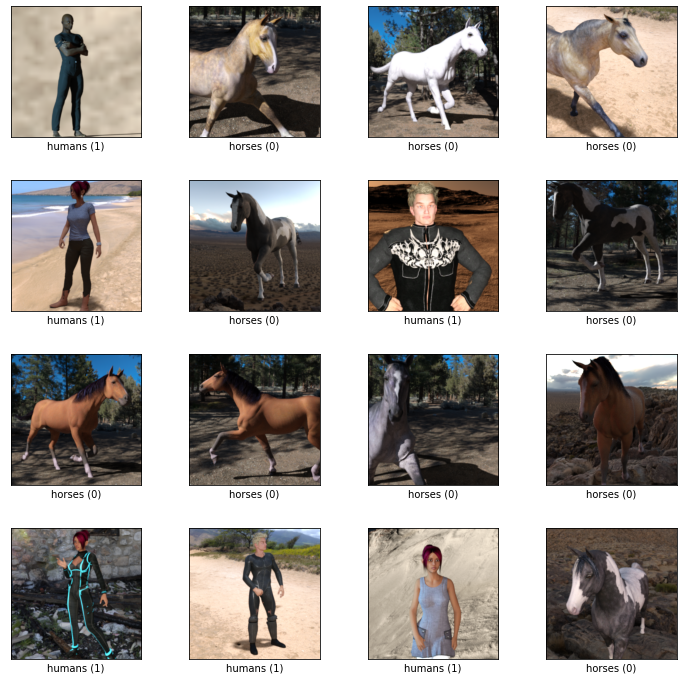

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='C:\\Users\\David\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)


In [3]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)
print(ds_info)

## Preparing

In [4]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 64
ds_train = ds_train.map(normalize_img, num_parallel_calls = AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls = AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(AUTOTUNE)

## Training

In [ ]:
model = keras.Sequential(
    [
        keras.Input((300, 300, 3)),
        layers.Conv2D(32, 3, padding="valid", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    metrics=["accuracy"],
)

history = model.fit(ds_train, batch_size=64, epochs=6, verbose=1)

Epoch 1/6
17/17 [==============================] - 45s 3s/step - loss: 2.0370 - accuracy: 0.5579
Epoch 2/6
17/17 [==============================] - 44s 3s/step - loss: 0.1757 - accuracy: 0.9572
Epoch 3/6
17/17 [==============================] - 45s 3s/step - loss: 0.0469 - accuracy: 0.9844
Epoch 4/6
17/17 [==============================] - 44s 3s/step - loss: 0.0168 - accuracy: 0.9971
Epoch 5/6
17/17 [==============================] - 44s 3s/step - loss: 0.0060 - accuracy: 0.9990
Epoch 6/6
13/17 [=====================>........] - ETA: 10s - loss: 0.0014 - accuracy: 1.0000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluation

In [ ]:
model.evaluate(ds_test, batch_size=64, verbose=2)